# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from pylab import savefig
from matplotlib import dates as mPlotDATEs
import csv

# import csv files

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/EEG/CSVFiles') # connected to your own drive path

Mounted at /content/drive


1. show csv files

In [3]:
df=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df

TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0      2022-08-30 22:16:17.807        NaN        NaN        NaN         NaN   
1      2022-08-30 22:16:17.848   0.603444   0.776066   0.616265    0.899000   
2      2022-08-30 22:16:17.849   0.603444   0.776066   0.616265    0.899000   
3      2022-08-30 22:16:17.849   0.603444   0.776066   0.616265    0.899000   
4      2022-08-30 22:16:17.849   0.603444   0.776066   0.616265    0.899000   
...                        ...        ...        ...        ...         ...   
13489  2022-08-30 22:17:09.535   0.831463  -0.475909   0.231694    0.399861   
13490  2022-08-30 22:17:09.536   0.831463  -0.475909   0.231694    0.399861   
13491  2022-08-30 22:17:09.537   0.831463  -0.475909   0.231694    0.399861   
13492  2022-08-30 22:17:09.538   0.831463  -0.475909   0.231694    0.399861   
13493  2022-08-30 22:17:09.540   0.831463  -0.475909   0.231694    0.399861   

       Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...    Gyro_X  \
0            NaN        NaN        NaN         NaN        NaN  ...       NaN   
1       0.563106   0.620625  -0.167508    0.736465   0.366385  ...  4.388885   
2       0.563106   0.620625  -0.167508    0.736465   0.366385  ...  4.388885   
3       0.563106   0.620625  -0.167508    0.736465   0.366385  ...  4.388885   
4       0.563106   0.620625  -0.167508    0.736465   0.366385  ...  4.388885   
...          ...        ...        ...         ...        ...  ...       ...   
13489   0.201589  -0.353189   0.215710    0.177175   0.423674  ...  5.615082   
13490   0.201589  -0.353189   0.215710    0.177175   0.423674  ...  5.615082   
13491   0.201589  -0.353189   0.215710    0.177175   0.423674  ...  5.615082   
13492   0.201589  -0.353189   0.215710    0.177175   0.423674  ...  5.615082   
13493   0.201589  -0.353189   0.215710    0.177175   0.423674  ...  5.615082   

          Gyro_Y    Gyro_Z  HeadBandOn  HSI_TP9  HSI_AF7  HSI_AF8  HSI_TP10  \
0            NaN       NaN         NaN      NaN      NaN      NaN       NaN   
1      36.845703 -2.998199         1.0      1.0      1.0      1.0       1.0   
2      36.845703 -2.998199         1.0      1.0      1.0      1.0       1.0   
3      36.845703 -2.998199         1.0      1.0      1.0      1.0       1.0   
4      36.845703 -2.998199         1.0      1.0      1.0      1.0       1.0   
...          ...       ...         ...      ...      ...      ...       ...   
13489  11.903076  1.652374         1.0      1.0      1.0      1.0       1.0   
13490  11.903076  1.652374         1.0      1.0      1.0      1.0       1.0   
13491  11.903076  1.652374         1.0      1.0      1.0      1.0       1.0   
13492  11.903076  1.652374         1.0      1.0      1.0      1.0       1.0   
13493  11.903076  1.652374         1.0      1.0      1.0      1.0       1.0   

       Battery                         Elements  
0          NaN  /muse/event/connected Muse-C5BF  
1         25.0                              NaN  
2         25.0                              NaN  
3         25.0                              NaN  
4         25.0                              NaN  
...        ...                              ...  
13489     25.0                              NaN  
13490     25.0                              NaN  
13491     25.0                              NaN  
13492     25.0                              NaN  
13493     25.0                              NaN  

[13494 rows x 39 columns]

2. plot all the data in csv

RangeIndex(start=0, stop=13494, step=1)


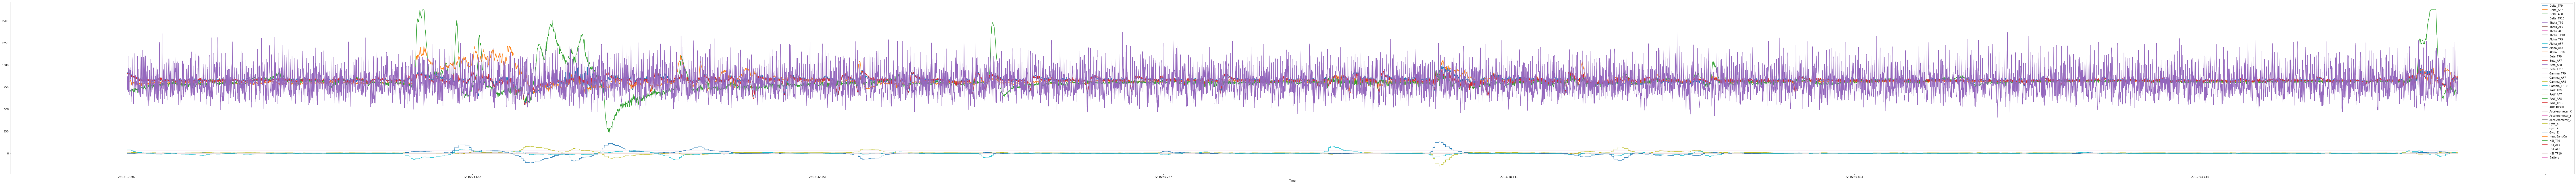

In [4]:
# plot all the colomns of the csv
df1=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
metadata = pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
index_num = metadata.index
print(index_num)
plt.rcParams["figure.figsize"] = [len(df1['Delta_TP9'])/100, 10] # change 100 to change the length of the plot
plt.rcParams["figure.autolayout"] = True

df1['Time']=metadata['TimeStamp'].str.split(' ',expand=True)[1]
df1['Date']=metadata['TimeStamp'].str.split(' ',expand=True)[0]
df1.set_index('Time').plot()
plt.show()

## deal with blinks and jaw clenches 

In [ ]:
#build a tabel with blink
df_withBlink=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df_withBlink['Time']=df_withBlink['TimeStamp'].str.split(' ',expand=True)[1]
df_withBlink['Date']=df_withBlink['TimeStamp'].str.split(' ',expand=True)[0]

total = len(df_withBlink['Delta_TP9'])
for i in range(len(df_withBlink['Delta_TP9'])):
  if str(df_withBlink["Elements"][total-i-1])=='nan' or str(df_withBlink["Elements"][total-i-1])=='/muse/elements/jaw_clench':
    df_withBlink.drop([total-i-1],axis=0,inplace=True)

df_withBlink

In [ ]:
#build a tabel with jaw_clench
df_with_jaw_clench = pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df_with_jaw_clench['Time']=df_with_jaw_clench['TimeStamp'].str.split(' ',expand=True)[1]
df_with_jaw_clench['Date']=df_with_jaw_clench['TimeStamp'].str.split(' ',expand=True)[0]

total = len(df_with_jaw_clench['Delta_TP9'])
for i in range(len(df_with_jaw_clench['Delta_TP9'])):
  if str(df_with_jaw_clench["Elements"][total-i-1])!='/muse/elements/jaw_clench':
    df_with_jaw_clench.drop([total-i-1],axis=0,inplace=True)

df_with_jaw_clench

Empty DataFrame
Columns: [TimeStamp, Delta_TP9, Delta_AF7, Delta_AF8, Delta_TP10, Theta_TP9, Theta_AF7, Theta_AF8, Theta_TP10, Alpha_TP9, Alpha_AF7, Alpha_AF8, Alpha_TP10, Beta_TP9, Beta_AF7, Beta_AF8, Beta_TP10, Gamma_TP9, Gamma_AF7, Gamma_AF8, Gamma_TP10, RAW_TP9, RAW_AF7, RAW_AF8, RAW_TP10, AUX_RIGHT, Accelerometer_X, Accelerometer_Y, Accelerometer_Z, Gyro_X, Gyro_Y, Gyro_Z, HeadBandOn, HSI_TP9, HSI_AF7, HSI_AF8, HSI_TP10, Battery, Elements, Time, Date]
Index: []

[0 rows x 41 columns]

In [ ]:
#build a tabel without blink and jaw clench
df_withoutBJ=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df_withoutBJ['Time']=df_withoutBJ['TimeStamp'].str.split(' ',expand=True)[1]
df_withoutBJ['Date']=df_withoutBJ['TimeStamp'].str.split(' ',expand=True)[0]

total = len(df_withoutBJ['Delta_TP9'])
for i in range(len(df_withoutBJ['Delta_TP9'])):
  if str(df_withoutBJ["Elements"][total-i-1])!='nan':
    df_withoutBJ.drop([total-i-1],axis=0,inplace=True)

df_withoutBJ

In [ ]:
df_withoutBJ["Elements"][1]

nan

## plot EEG

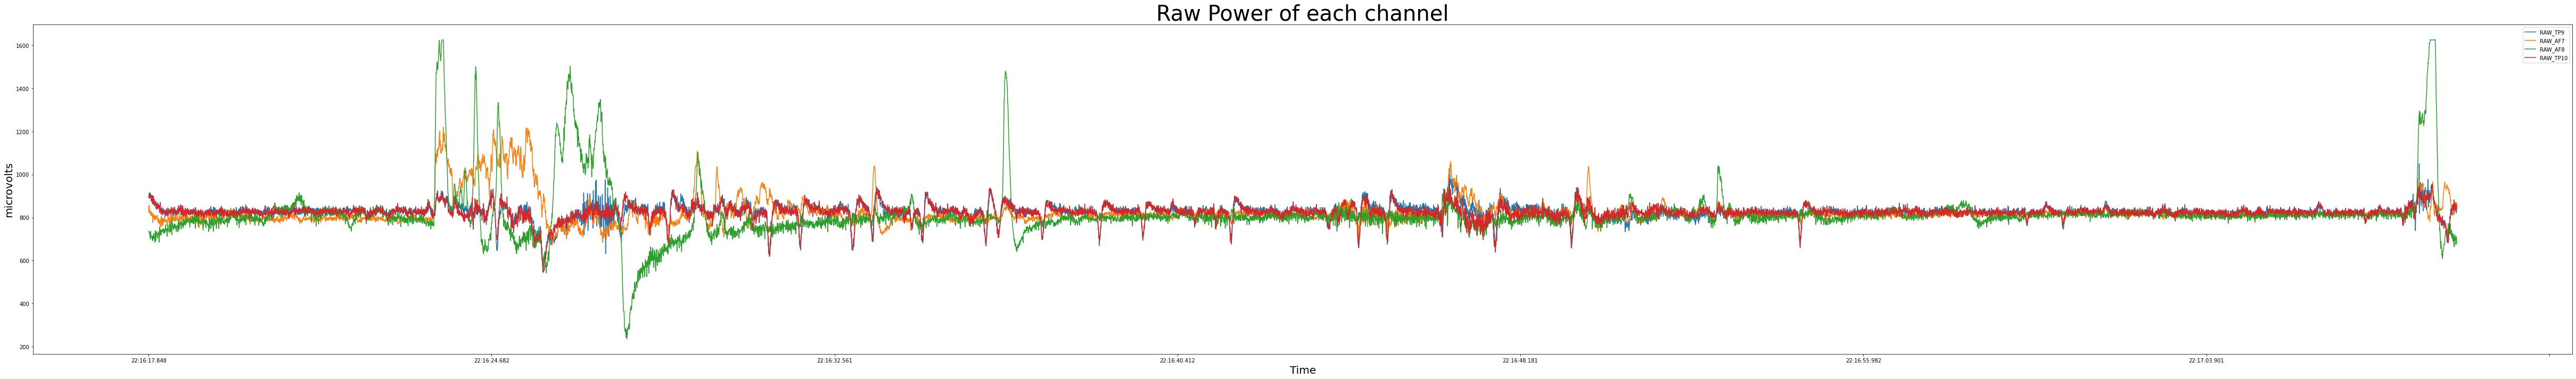

In [ ]:
#plot EEG_Power only
df_raw_channels=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df_raw_channels['Time']=df_raw_channels['TimeStamp'].str.split(' ',expand=True)[1]
df_raw_channels['Date']=df_raw_channels['TimeStamp'].str.split(' ',expand=True)[0]

total = len(df_raw_channels['Delta_TP9'])
for i in range(len(df_raw_channels['Delta_TP9'])):
  if str(df_raw_channels["Elements"][total-i-1])!='nan':
   df_raw_channels.drop([total-i-1],axis=0,inplace=True)


df_raw_channels=df_raw_channels.drop(["TimeStamp","Delta_TP9","Delta_AF7","Delta_AF8","Delta_TP10","Theta_TP9","Theta_AF7","Theta_AF8","Theta_TP10","Alpha_TP9","Alpha_AF7","Alpha_AF8","Alpha_TP10","Beta_TP9","Beta_AF7","Beta_AF8","Beta_TP10","Gamma_TP9","Gamma_AF7","Gamma_AF8","Gamma_TP10","Elements",'Battery','HSI_TP10', 'HSI_AF8',"AUX_RIGHT","Accelerometer_X","Accelerometer_Y","Accelerometer_Z","Gyro_X","Gyro_Y","Gyro_Z","HeadBandOn","HSI_TP9","HSI_AF7"], axis=1)

#plot EEG_Power only
plt.rcParams["figure.figsize"] = [len(df_raw_channels['Time'])/200, 10]  # change 200 to change the length of the plot
plt.rcParams["figure.autolayout"] = True
df_raw_channels.set_index('Time').plot()
plt.xlabel('Time', fontsize=20) 
plt.ylabel('microvolts', fontsize=20) 

plt.title("Raw Power of each channel", fontsize=40)
plt.show()

In [ ]:
df_raw_channels['Time']

1        22:16:17.848
2        22:16:17.849
3        22:16:17.849
4        22:16:17.849
5        22:16:17.850
             ...     
13489    22:17:09.535
13490    22:17:09.536
13491    22:17:09.537
13492    22:17:09.538
13493    22:17:09.540
Name: Time, Length: 13462, dtype: object

In [ ]:
# for i in df_raw_channels['Time']:
#   print(i[-6:-1])
# Open file
# with open("/content/drive/MyDrive/EEG/CSVFiles/demo.csv",'w') as file_obj:
      
#     # Skips the heading, Using next() method
#     heading = next(file_obj)
#     print(heading)
#     # Create reader object by passing the file, object to reader method
#     reader_obj = csv.reader(file_obj)
#     data = ['Afghanistan', 652090, 'AF', 'AFG']
#     writer = csv.writer(file_obj)
#     writer.writerow(data)
#     # Iterate over each row in the csv file, using reader object
#     # for row in reader_obj:
#     #     print(row[0][-6:-1])

# header = ['name', 'area', 'country_code2', 'country_code3']


# with open('output.csv', 'w', encoding='UTF8') as f:
#     writer = csv.writer(f)

#     # 写入头
#     writer.writerow(heading)

    # 写入数据

add_info = []
df_add = open("/content/drive/MyDrive/EEG/CSVFiles/demo.csv",'a')
writer = csv.writer(df_add)
writer.writerow(add_info)
df_add.close()

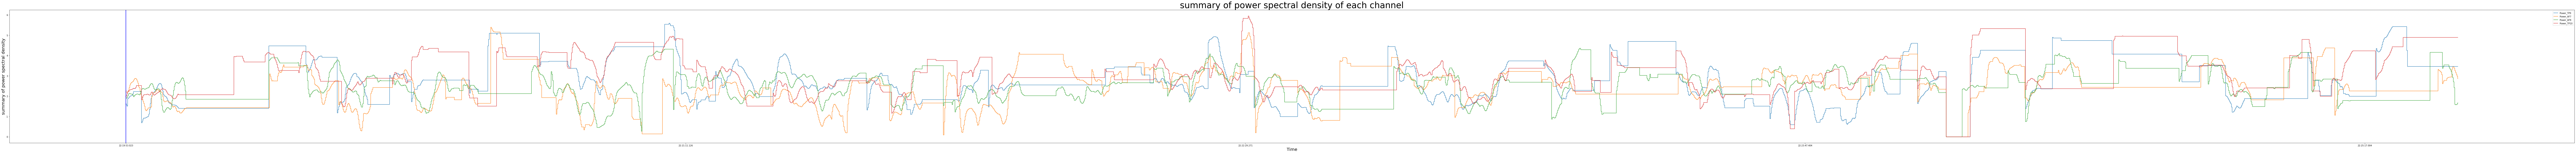

In [ ]:
#plot EEG_Power only
df_power=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/20220830_Guzden_video_1.csv")
df_power['Time']=df_power['TimeStamp'].str.split(' ',expand=True)[1]
df_power['Date']=df_power['TimeStamp'].str.split(' ',expand=True)[0]

total = len(df_power['Delta_TP9'])
for i in range(len(df_power['Delta_TP9'])):
  if str(df_power["Elements"][total-i-1])!='nan':
    df_power.drop([total-i-1],axis=0,inplace=True)


df_power['Power_TP9']=df_power["Delta_TP9"]+df_power["Beta_TP9"]+df_power["Alpha_TP9"]+df_power["Gamma_TP9"]+df_power["Theta_TP9"]
df_power['Power_AF7']=df_power["Delta_AF7"]+df_power["Beta_AF7"]+df_power["Alpha_AF7"]+df_power["Gamma_AF7"]+df_power["Theta_AF7"]
df_power['Power_AF8']=df_power["Delta_AF8"]+df_power["Beta_AF8"]+df_power["Alpha_AF8"]+df_power["Gamma_AF8"]+df_power["Theta_AF8"]
df_power['Power_TP10']=df_power["Delta_TP10"]+df_power["Beta_TP10"]+df_power["Alpha_TP10"]+df_power["Gamma_TP10"]+df_power["Theta_TP10"]
df_power=df_power.drop(["TimeStamp","Elements",'Battery','HSI_TP10', 'HSI_AF8',"Delta_TP9","Delta_AF7","Delta_AF8","Delta_TP10","Theta_TP9","Theta_AF7","Theta_AF8","Theta_TP10","Alpha_TP9","Alpha_AF7","Alpha_AF8","Alpha_TP10","Beta_TP9","Beta_AF7","Beta_AF8","Beta_TP10","Gamma_TP9","Gamma_AF7","Gamma_AF8","Gamma_TP10","RAW_TP9","RAW_AF7","RAW_AF8","RAW_TP10","AUX_RIGHT","Accelerometer_X","Accelerometer_Y","Accelerometer_Z","Gyro_X","Gyro_Y","Gyro_Z","HeadBandOn","HSI_TP9","HSI_AF7"], axis=1)

#plot EEG_Power only
plt.rcParams["figure.figsize"] = [len(df_power['Power_TP9'])/500, 10] # change 200 to change the length of the plot
plt.rcParams["figure.autolayout"] = True
df_power.set_index('Time').plot()
plt.xlabel('Time', fontsize=20) 
plt.ylabel('summary of power spectral density', fontsize=20) 
plt.axvline(x="22:22:09.723",linewidth=2, color='b')

plt.title("summary of power spectral density of each channel", fontsize=40)
plt.show()

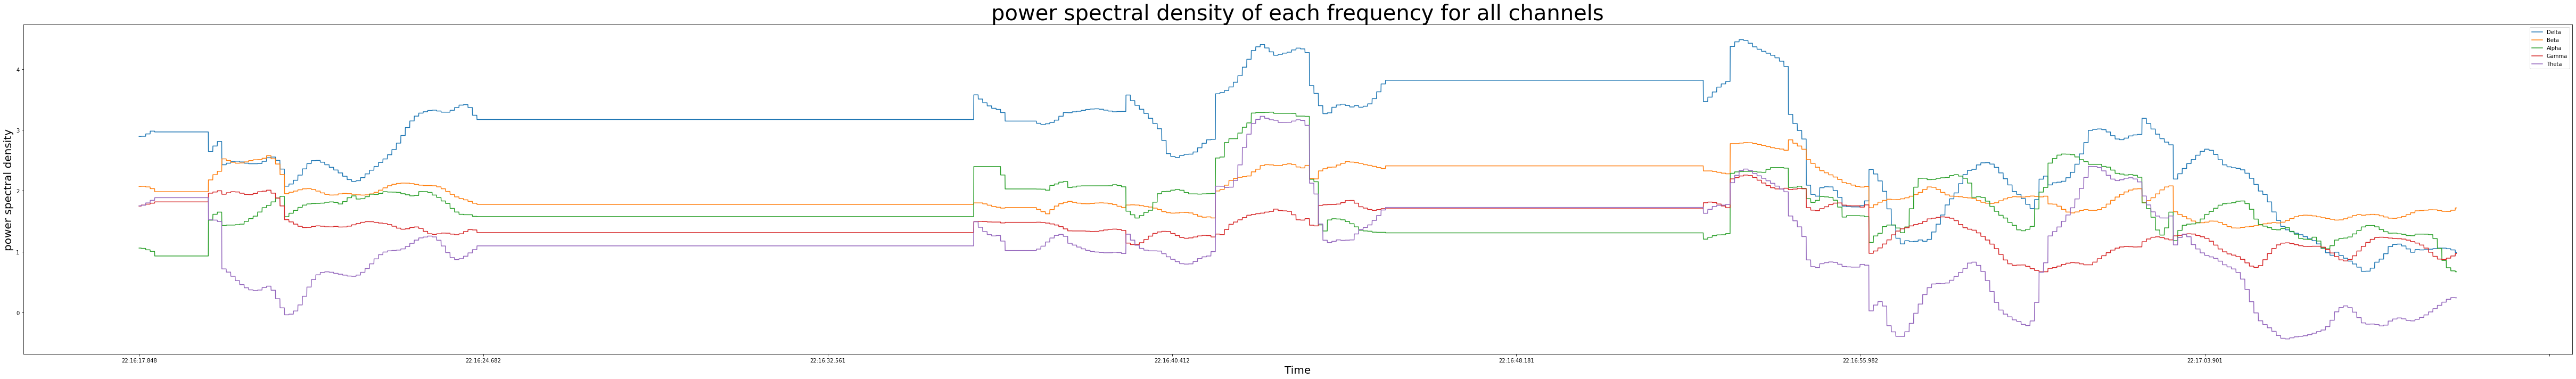

<Figure size 4846.32x720 with 0 Axes>

In [ ]:
#plot EEG_Hz only
df_Hz=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df_Hz['Time']=df_Hz['TimeStamp'].str.split(' ',expand=True)[1]
df_Hz['Date']=df_Hz['TimeStamp'].str.split(' ',expand=True)[0]

total = len(df_Hz['Delta_TP9'])
for i in range(len(df_Hz['Delta_TP9'])):
  if str(df_Hz["Elements"][total-i-1])!='nan':
    df_Hz.drop([total-i-1],axis=0,inplace=True)


df_Hz['Delta']=df_Hz["Delta_TP9"]+df_Hz["Delta_TP10"]+df_Hz["Delta_AF7"]+df_Hz["Delta_AF8"]
df_Hz['Beta']=df_Hz["Beta_TP9"]+df_Hz["Beta_TP10"]+df_Hz["Beta_AF7"]+df_Hz["Beta_AF8"]
df_Hz['Alpha']=df_Hz["Alpha_TP9"]+df_Hz["Alpha_TP10"]+df_Hz["Alpha_AF7"]+df_Hz["Alpha_AF8"]
df_Hz['Gamma']=df_Hz["Gamma_TP9"]+df_Hz["Gamma_TP10"]+df_Hz["Gamma_AF7"]+df_Hz["Gamma_AF8"]
df_Hz['Theta']=df_Hz["Theta_TP9"]+df_Hz["Theta_TP10"]+df_Hz["Theta_AF7"]+df_Hz["Theta_AF8"]
df_Hz=df_Hz.drop(["TimeStamp","Elements",'Battery','HSI_TP10', 'HSI_AF8',"Delta_TP9","Delta_AF7","Delta_AF8","Delta_TP10","Theta_TP9","Theta_AF7","Theta_AF8","Theta_TP10","Alpha_TP9","Alpha_AF7","Alpha_AF8","Alpha_TP10","Beta_TP9","Beta_AF7","Beta_AF8","Beta_TP10","Gamma_TP9","Gamma_AF7","Gamma_AF8","Gamma_TP10","RAW_TP9","RAW_AF7","RAW_AF8","RAW_TP10","AUX_RIGHT","Accelerometer_X","Accelerometer_Y","Accelerometer_Z","Gyro_X","Gyro_Y","Gyro_Z","HeadBandOn","HSI_TP9","HSI_AF7"], axis=1)

#plot EEG_Power only
plt.rcParams["figure.figsize"] = [len(df_Hz['Gamma'])/200, 10] # change 200 to change the length of the plot
plt.rcParams["figure.autolayout"] = True
df_Hz.set_index('Time').plot()
plt.xlabel('Time', fontsize=20) 
plt.ylabel('power spectral density', fontsize=20) 

# add x-positions as a list of date strings
# plt.vlines(x=['22:16:24.682'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')
# plt.axvline(x ="22:16:24.682", color = 'b', label = 'axvline - full height')

plt.title("power spectral density of each frequency for all channels", fontsize=40)
plt.show()
plt.savefig('power_per_freq.png')
# ax.axvline(blink["Time"]), color="red", linestyle="--")


['', '22:16:17.807', '22:16:17.848', '22:16:17.849', '22:16:17.849', '22:16:17.849', '22:16:17.850', '22:16:17.850', '22:16:17.850', '22:16:17.851', '22:16:17.851', '22:16:17.851', '22:16:17.851', '22:16:17.852', '22:16:17.852', '22:16:17.853', '22:16:17.852', '22:16:17.853', '22:16:17.853', '22:16:17.854', '22:16:17.854', '22:16:17.854', '22:16:17.854', '22:16:17.855', '22:16:17.855', '22:16:17.855', '22:16:17.855', '22:16:17.857', '22:16:17.857', '22:16:17.857', '22:16:17.857', '22:16:17.858', '22:16:17.858', '22:16:17.858', '22:16:17.858', '22:16:17.859', '22:16:17.859', '22:16:17.859', '22:16:17.859', '22:16:17.859', '22:16:17.860', '22:16:17.860', '22:16:17.860', '22:16:17.861', '22:16:17.861', '22:16:17.861', '22:16:17.862', '22:16:17.862', '22:16:17.862', '22:16:17.862', '22:16:17.862', '22:16:17.863', '22:16:17.864', '22:16:17.864', '22:16:17.864', '22:16:17.864', '22:16:17.864', '22:16:17.865', '22:16:17.865', '22:16:17.865', '22:16:17.865', '22:16:17.865', '22:16:17.866', '22

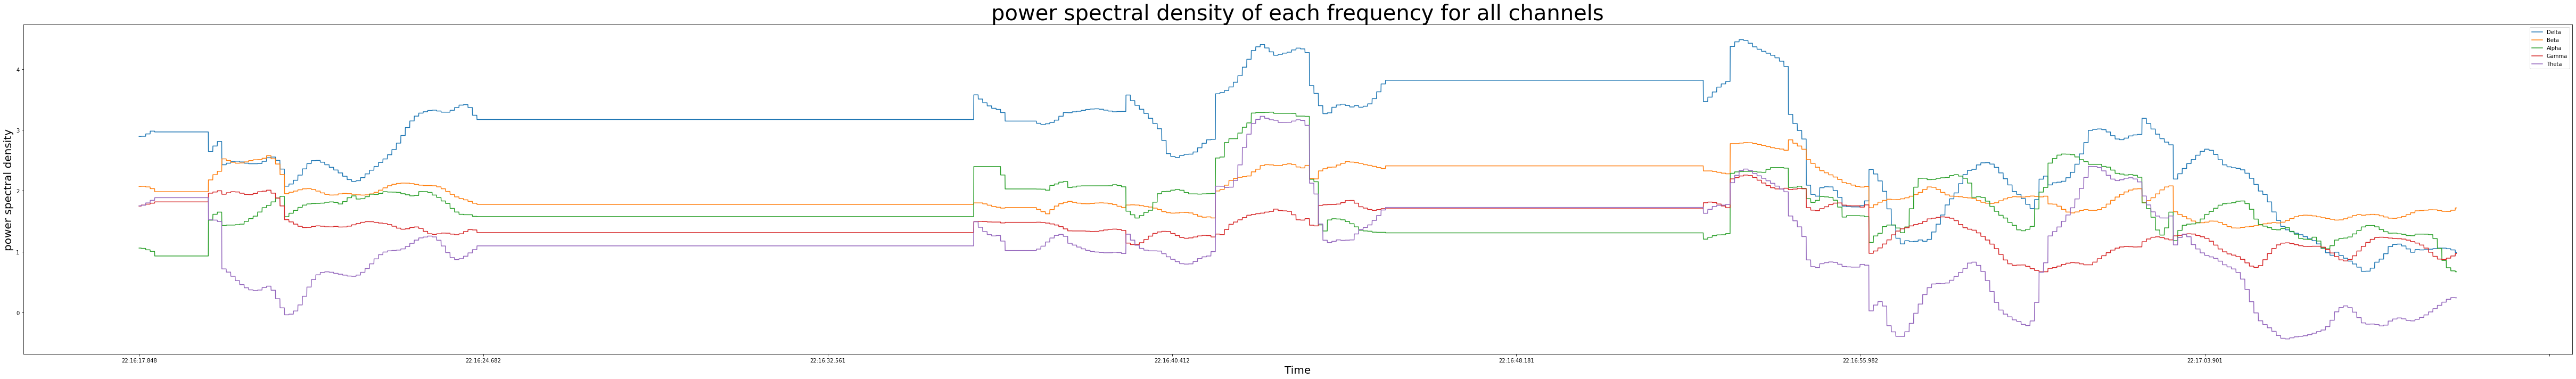

<Figure size 4846.32x720 with 0 Axes>

In [ ]:
#plot EEG_Hz only
df_Hz=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df_Hz['Time']=df_Hz['TimeStamp'].str.split(' ',expand=True)[1]
df_Hz['Date']=df_Hz['TimeStamp'].str.split(' ',expand=True)[0]

l = [""]
for i in df_Hz["Time"]:
  l+= [i]
print(l)

total = len(df_Hz['Delta_TP9'])
for i in range(len(df_Hz['Delta_TP9'])):
  if str(df_Hz["Elements"][total-i-1])!='nan':
    df_Hz.drop([total-i-1],axis=0,inplace=True)


df_Hz['Delta']=df_Hz["Delta_TP9"]+df_Hz["Delta_TP10"]+df_Hz["Delta_AF7"]+df_Hz["Delta_AF8"]
df_Hz['Beta']=df_Hz["Beta_TP9"]+df_Hz["Beta_TP10"]+df_Hz["Beta_AF7"]+df_Hz["Beta_AF8"]
df_Hz['Alpha']=df_Hz["Alpha_TP9"]+df_Hz["Alpha_TP10"]+df_Hz["Alpha_AF7"]+df_Hz["Alpha_AF8"]
df_Hz['Gamma']=df_Hz["Gamma_TP9"]+df_Hz["Gamma_TP10"]+df_Hz["Gamma_AF7"]+df_Hz["Gamma_AF8"]
df_Hz['Theta']=df_Hz["Theta_TP9"]+df_Hz["Theta_TP10"]+df_Hz["Theta_AF7"]+df_Hz["Theta_AF8"]
df_Hz=df_Hz.drop(["TimeStamp","Elements",'Battery','HSI_TP10', 'HSI_AF8',"Delta_TP9","Delta_AF7","Delta_AF8","Delta_TP10","Theta_TP9","Theta_AF7","Theta_AF8","Theta_TP10","Alpha_TP9","Alpha_AF7","Alpha_AF8","Alpha_TP10","Beta_TP9","Beta_AF7","Beta_AF8","Beta_TP10","Gamma_TP9","Gamma_AF7","Gamma_AF8","Gamma_TP10","RAW_TP9","RAW_AF7","RAW_AF8","RAW_TP10","AUX_RIGHT","Accelerometer_X","Accelerometer_Y","Accelerometer_Z","Gyro_X","Gyro_Y","Gyro_Z","HeadBandOn","HSI_TP9","HSI_AF7"], axis=1)

#plot EEG_Power only
plt.rcParams["figure.figsize"] = [len(df_Hz['Gamma'])/200, 10] # change 200 to change the length of the plot
plt.rcParams["figure.autolayout"] = True
df_Hz.set_index('Time').plot()
plt.xlabel('Time', fontsize=20) 
plt.ylabel('power spectral density', fontsize=20) 

# add x-positions as a list of date strings
# plt.vlines(x=['22:16:24.682'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')
# plt.axvline(x ="22:16:24.682", color = 'b', label = 'axvline - full height')

plt.title("power spectral density of each frequency for all channels", fontsize=40)
plt.show()
plt.savefig('power_per_freq.png')
# ax.axvline(blink["Time"]), color="red", linestyle="--")


##dropped

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
total = len(df['Delta_TP9'])
for i in range(len(df['Delta_TP9'])):
  if str(df["Elements"][total-i-1])!='nan':
    df.drop([total-i-1],axis=0,inplace=True)
df=df.drop(["Elements"],axis = 1)
df.to_csv("/content/drive/MyDrive/EEG/CSVFiles/file.csv")

path = "/content/drive/MyDrive/EEG/CSVFiles/file.csv"
wpath="/content/drive/MyDrive/EEG/CSVFiles/output5.csv"
f = open(wpath, 'w')
writer = csv.writer(f)# create the csv writer
reader = csv.reader(open(path,"r"))

count = 0
rows =[]
timeinsecond = []
timelist = []

for row in reader:
  timeinsecond.append (row[0][-9:-1]) # the 1/100' s
  # print(row)
  perrow = []
  if row[0]=='TimeStamp':
    perrow.append([])
  else:
    for colum in row:
      perrow.append(colum)
      # perrow.append(float(colum))
    rows.append(perrow)


print(rows[0]) # write header in new csv

for item in range(1, len(timeinsecond)-1):
  if timeinsecond[item] == timeinsecond[item+1]:
    for i in range(1,len(rows[item])):
      rows[item] += rows[item+1]
      count +=1
  else:
    for i in range(2,len(rows[item])):
      print(rows[item])
      if type(rows[item])==float:
        rows[item] = rows[item]/count
    count =0
  writer.writerow(perrow) # write a row to the csv file
f.close() # close the file






# a = np.zeros( [len(l),len(l[1])])
# print(a)

# sum =[]
# for time in range(len(l)):
#   if l[time] == l[time-1]:
#     sum += reader[time-1]
#     count += 1
#   else: 
#     sum += reader[time]
#     count += 1
#     avr = sum/count 


print(len(timeinsecond)) # length of the rows 
print(count)

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
total = len(df['Delta_TP9'])
for i in range(len(df['Delta_TP9'])):
  if str(df["Elements"][total-i-1])!='nan':
    df.drop([total-i-1],axis=0,inplace=True)
df=df.drop(["Elements"],axis = 1)
df.to_csv("/content/drive/MyDrive/EEG/CSVFiles/file.csv")



In [ ]:
df

In [ ]:
path = "/content/drive/MyDrive/EEG/CSVFiles/file.csv"
reader = csv.reader(open(path,"r"))
timeinsecond = []
rowindex=[]

for row in reader:
  timeinsecond.append (row[0][-9:-1]) # the 1/100' s
  rowindex.append(row[1])




In [ ]:
df

In [ ]:
rowindex

In [ ]:
df['TimeStamp']

In [ ]:
df

In [ ]:
for item in range(2, len(timeinsecond)):
  if timeinsecond[item] == timeinsecond[item-1]:
    # df = df.iloc[item+1:]
    # df = df.drop([item+1])
    # df.drop([item+1], inplace = True)
    # df = df.drop(index=rowindex[item+1],axis =0)
    # df=df.drop(index='2022-08-30 22:16:17.849',)
    df=df.drop(index=2, axis=0)

KeyError: ignored

## 1/10seconds

In [ ]:
path = "/content/drive/MyDrive/EEG/CSVFiles/file.csv"
wpath="/content/drive/MyDrive/EEG/CSVFiles/output11.csv"
f = open(wpath, 'w')
writer = csv.writer(f)# create the csv writer
reader = csv.reader(open(path,"r"))

count = 0
rows =[]
timeinsecond = []
timelist = []

for row in reader:
  timeinsecond.append (row[1][-9:-2]) # the 1/10' s
  # print(row)
  perrow = []
  if row[0]=='TimeStamp':
    perrow.append(["TimeStamp","Delta_TP9","Delta_AF7","Delta_AF8","Delta_TP10","Theta_TP9","Theta_AF7","Theta_AF8","Theta_TP10","Alpha_TP9","Alpha_AF7","Alpha_AF8","Alpha_TP10","Beta_TP9","Beta_AF7","Beta_AF8","Beta_TP10","Gamma_TP9","Gamma_AF7","Gamma_AF8","Gamma_TP10","RAW_TP9","RAW_AF7","RAW_AF8","RAW_TP10","AUX_RIGHT","Accelerometer_X","Accelerometer_Y","Accelerometer_Z","Gyro_X","Gyro_Y","Gyro_Z","HeadBandOn","HSI_TP9","HSI_AF7","HSI_AF8","HSI_TP10","Battery","Elements"])
  else:
    for colum in row:
      perrow.append(colum)
      # perrow.append(float(colum))
    rows.append(perrow)

for item in range(0, len(timeinsecond)-1):
  if timeinsecond[item] == timeinsecond[item-1]:
    for i in range(1,len(rows[item])):
      count +=1
  else:
    writer.writerow(rows[item]) # write a row to the csv file
f.close() # close the file
df=pd.read_csv(wpath)
df['TimeStamp']=df['TimeStamp'].str[:-2]
df=df.drop(["Unnamed: 0"],axis =1)
df.to_csv("/content/drive/MyDrive/EEG/CSVFiles/output11.csv")


In [ ]:
df

TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  \
0    2022-08-30 22:16:17.8   0.603444   0.776066   0.616265    0.899000   
1    2022-08-30 22:16:17.9   0.603444   0.848787   0.616265    0.899000   
2    2022-08-30 22:16:18.0   0.603444   0.848787   0.616265    0.899000   
3    2022-08-30 22:16:18.1   0.603444   0.848787   0.616265    0.899000   
4    2022-08-30 22:16:18.2   0.603444   0.848787   0.616265    0.899000   
..                     ...        ...        ...        ...         ...   
491  2022-08-30 22:17:09.1   0.831463  -0.396045   0.223524    0.399861   
492  2022-08-30 22:17:09.2   0.831463  -0.427679   0.254270    0.399861   
493  2022-08-30 22:17:09.3   0.831463  -0.457094   0.273713    0.399861   
494  2022-08-30 22:17:09.4   0.831463  -0.472169   0.269214    0.399861   
495  2022-08-30 22:17:09.5   0.831463  -0.472169   0.269214    0.399861   

     Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  Alpha_TP9  ...  \
0     0.563106   0.620625  -0.167508    0.736465   0.366385  ...   
1     0.563106   0.754797  -0.167508    0.736465   0.366385  ...   
2     0.563106   0.754797  -0.167508    0.736465   0.366385  ...   
3     0.563106   0.754797  -0.167508    0.736465   0.366385  ...   
4     0.563106   0.754797  -0.167508    0.736465   0.366385  ...   
..         ...        ...        ...         ...        ...  ...   
491   0.201589  -0.396419   0.135198    0.177175   0.423674  ...   
492   0.201589  -0.372115   0.163417    0.177175   0.423674  ...   
493   0.201589  -0.355205   0.193178    0.177175   0.423674  ...   
494   0.201589  -0.349446   0.216082    0.177175   0.423674  ...   
495   0.201589  -0.349446   0.216082    0.177175   0.423674  ...   

     Accelerometer_Z    Gyro_X     Gyro_Y     Gyro_Z  HeadBandOn  HSI_TP9  \
0           0.590332  4.388885  36.845703  -2.998199         1.0      1.0   
1           0.505127  3.633728  -4.134674   1.368256         1.0      2.0   
2           0.501709  2.422485  -9.480591   2.444916         1.0      2.0   
3           0.498230  2.803802 -11.678772   2.145844         1.0      2.0   
4           0.517700  3.902893 -12.972260   0.403748         1.0      2.0   
..               ...       ...        ...        ...         ...      ...   
491         0.576294  7.932892 -36.636353  20.262146         1.0      1.0   
492         0.673096  5.151520 -11.529236   8.994598         1.0      1.0   
493         0.591187  9.398346   0.792542   2.983246         1.0      1.0   
494         0.590271  7.259979   5.921631   2.527161         1.0      1.0   
495         0.609070  5.615082  11.903076   1.652374         1.0      1.0   

     HSI_AF7  HSI_AF8  HSI_TP10  Battery  
0        1.0      1.0       1.0     25.0  
1        1.0      1.0       2.0     25.0  
2        1.0      1.0       2.0     25.0  
3        1.0      1.0       2.0     25.0  
4        1.0      1.0       2.0     25.0  
..       ...      ...       ...      ...  
491      1.0      1.0       1.0     25.0  
492      1.0      1.0       1.0     25.0  
493      1.0      1.0       1.0     25.0  
494      1.0      1.0       1.0     25.0  
495      1.0      1.0       1.0     25.0  

[496 rows x 38 columns]

In [ ]:
df

Unnamed: 0              TimeStamp  Delta_TP9  Delta_AF7  Delta_AF8  \
0             1  2022-08-30 22:16:17.8   0.603444   0.776066   0.616265   
1           231  2022-08-30 22:16:17.9   0.603444   0.848787   0.616265   
2           290  2022-08-30 22:16:18.0   0.603444   0.848787   0.616265   
3           314  2022-08-30 22:16:18.1   0.603444   0.848787   0.616265   
4           350  2022-08-30 22:16:18.2   0.603444   0.848787   0.616265   
..          ...                    ...        ...        ...        ...   
491       13397  2022-08-30 22:17:09.1   0.831463  -0.396045   0.223524   
492       13423  2022-08-30 22:17:09.2   0.831463  -0.427679   0.254270   
493       13447  2022-08-30 22:17:09.3   0.831463  -0.457094   0.273713   
494       13476  2022-08-30 22:17:09.4   0.831463  -0.472169   0.269214   
495       13483  2022-08-30 22:17:09.5   0.831463  -0.472169   0.269214   

     Delta_TP10  Theta_TP9  Theta_AF7  Theta_AF8  Theta_TP10  ...  \
0      0.899000   0.563106   0.620625  -0.167508    0.736465  ...   
1      0.899000   0.563106   0.754797  -0.167508    0.736465  ...   
2      0.899000   0.563106   0.754797  -0.167508    0.736465  ...   
3      0.899000   0.563106   0.754797  -0.167508    0.736465  ...   
4      0.899000   0.563106   0.754797  -0.167508    0.736465  ...   
..          ...        ...        ...        ...         ...  ...   
491    0.399861   0.201589  -0.396419   0.135198    0.177175  ...   
492    0.399861   0.201589  -0.372115   0.163417    0.177175  ...   
493    0.399861   0.201589  -0.355205   0.193178    0.177175  ...   
494    0.399861   0.201589  -0.349446   0.216082    0.177175  ...   
495    0.399861   0.201589  -0.349446   0.216082    0.177175  ...   

     Accelerometer_Z    Gyro_X     Gyro_Y     Gyro_Z  HeadBandOn  HSI_TP9  \
0           0.590332  4.388885  36.845703  -2.998199         1.0      1.0   
1           0.505127  3.633728  -4.134674   1.368256         1.0      2.0   
2           0.501709  2.422485  -9.480591   2.444916         1.0      2.0   
3           0.498230  2.803802 -11.678772   2.145844         1.0      2.0   
4           0.517700  3.902893 -12.972260   0.403748         1.0      2.0   
..               ...       ...        ...        ...         ...      ...   
491         0.576294  7.932892 -36.636353  20.262146         1.0      1.0   
492         0.673096  5.151520 -11.529236   8.994598         1.0      1.0   
493         0.591187  9.398346   0.792542   2.983246         1.0      1.0   
494         0.590271  7.259979   5.921631   2.527161         1.0      1.0   
495         0.609070  5.615082  11.903076   1.652374         1.0      1.0   

     HSI_AF7  HSI_AF8  HSI_TP10  Battery  
0        1.0      1.0       1.0     25.0  
1        1.0      1.0       2.0     25.0  
2        1.0      1.0       2.0     25.0  
3        1.0      1.0       2.0     25.0  
4        1.0      1.0       2.0     25.0  
..       ...      ...       ...      ...  
491      1.0      1.0       1.0     25.0  
492      1.0      1.0       1.0     25.0  
493      1.0      1.0       1.0     25.0  
494      1.0      1.0       1.0     25.0  
495      1.0      1.0       1.0     25.0  

[496 rows x 39 columns]

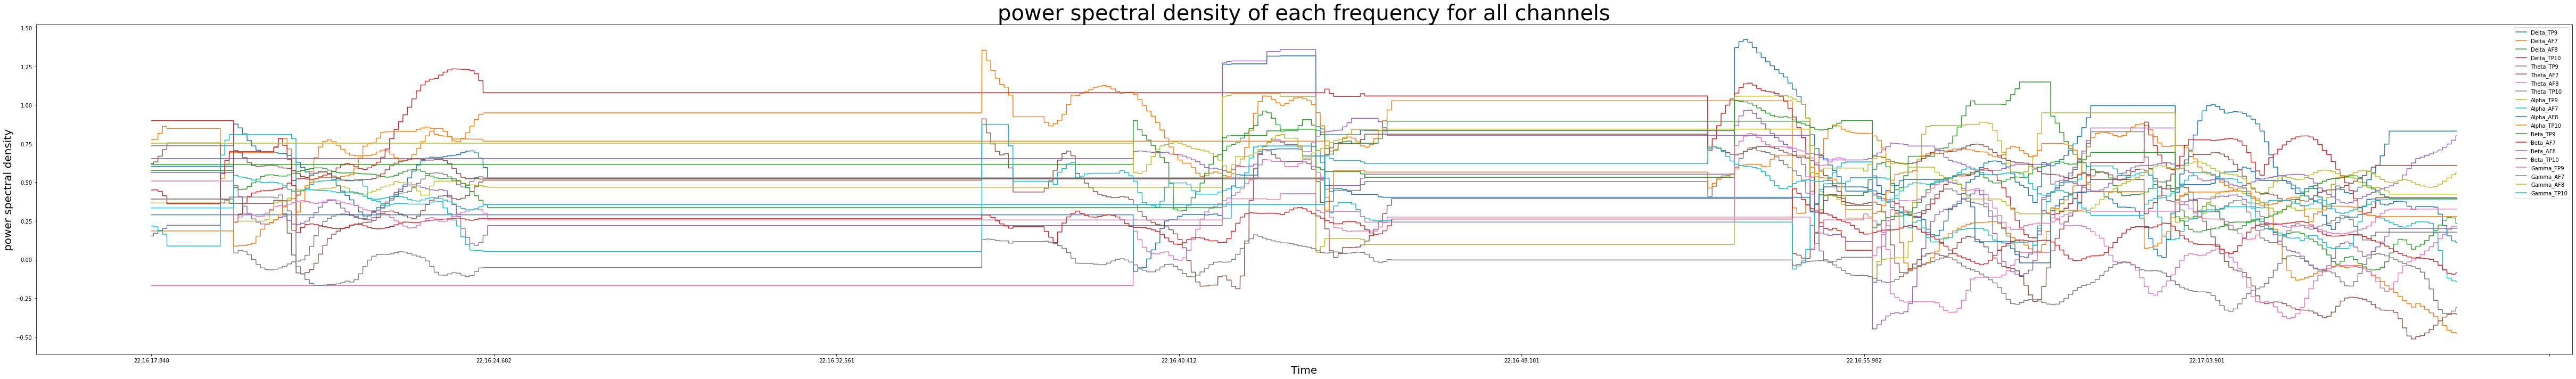

In [ ]:
#plot EEG_Hz only
df_20=pd.read_csv("/content/drive/MyDrive/EEG/CSVFiles/demo.csv")
df_20['Time']=df_20['TimeStamp'].str.split(' ',expand=True)[1]
df_20['Date']=df_20['TimeStamp'].str.split(' ',expand=True)[0]

total = len(df_20['Delta_TP9'])
for i in range(len(df_20['Delta_TP9'])):
  if str(df_20["Elements"][total-i-1])!='nan':
    df_20.drop([total-i-1],axis=0,inplace=True)


df_20=df_20.drop(["TimeStamp","Elements",'Battery','HSI_TP10', 'HSI_AF8',"RAW_TP9","RAW_AF7","RAW_AF8","RAW_TP10","AUX_RIGHT","Accelerometer_X","Accelerometer_Y","Accelerometer_Z","Gyro_X","Gyro_Y","Gyro_Z","HeadBandOn","HSI_TP9","HSI_AF7"], axis=1)

#plot EEG_Power only
plt.rcParams["figure.figsize"] = [len(df_20['Time'])/200, 10] # change 200 to change the length of the plot
plt.rcParams["figure.autolayout"] = True
df_20.set_index('Time').plot()
plt.xlabel('Time', fontsize=20) 
plt.ylabel('power spectral density', fontsize=20) 

plt.title("power spectral density of each frequency for all channels", fontsize=40)
plt.show()

In [ ]:
df_20

Delta_TP9  Delta_AF7  Delta_AF8  Delta_TP10  Theta_TP9  Theta_AF7  \
1       0.603444   0.776066   0.616265    0.899000   0.563106   0.620625   
2       0.603444   0.776066   0.616265    0.899000   0.563106   0.620625   
3       0.603444   0.776066   0.616265    0.899000   0.563106   0.620625   
4       0.603444   0.776066   0.616265    0.899000   0.563106   0.620625   
5       0.603444   0.776066   0.616265    0.899000   0.563106   0.620625   
...          ...        ...        ...         ...        ...        ...   
13489   0.831463  -0.475909   0.231694    0.399861   0.201589  -0.353189   
13490   0.831463  -0.475909   0.231694    0.399861   0.201589  -0.353189   
13491   0.831463  -0.475909   0.231694    0.399861   0.201589  -0.353189   
13492   0.831463  -0.475909   0.231694    0.399861   0.201589  -0.353189   
13493   0.831463  -0.475909   0.231694    0.399861   0.201589  -0.353189   

       Theta_AF8  Theta_TP10  Alpha_TP9  Alpha_AF7  ...  Beta_TP9  Beta_AF7  \
1      -0.167508    0.736465   0.366385   0.217878  ...  0.576888  0.449912   
2      -0.167508    0.736465   0.366385   0.217878  ...  0.576888  0.449912   
3      -0.167508    0.736465   0.366385   0.217878  ...  0.576888  0.449912   
4      -0.167508    0.736465   0.366385   0.217878  ...  0.576888  0.449912   
5      -0.167508    0.736465   0.366385   0.217878  ...  0.576888  0.449912   
...          ...         ...        ...        ...  ...       ...       ...   
13489   0.215710    0.177175   0.423674  -0.141794  ...  0.394273 -0.085204   
13490   0.215710    0.177175   0.423674  -0.141794  ...  0.394273 -0.085204   
13491   0.215710    0.177175   0.423674  -0.141794  ...  0.394273 -0.085204   
13492   0.215710    0.177175   0.423674  -0.141794  ...  0.394273 -0.085204   
13493   0.215710    0.177175   0.423674  -0.141794  ...  0.394273 -0.085204   

       Beta_AF8  Beta_TP10  Gamma_TP9  Gamma_AF7  Gamma_AF8  Gamma_TP10  \
1      0.654117   0.391640   0.508674   0.152378   0.753221    0.334016   
2      0.654117   0.391640   0.508674   0.152378   0.753221    0.334016   
3      0.654117   0.391640   0.508674   0.152378   0.753221    0.334016   
4      0.654117   0.391640   0.508674   0.152378   0.753221    0.334016   
5      0.654117   0.391640   0.508674   0.152378   0.753221    0.334016   
...         ...        ...        ...        ...        ...         ...   
13489  0.800661   0.608914   0.326814  -0.307995   0.563544    0.386956   
13490  0.800661   0.608914   0.326814  -0.307995   0.563544    0.386956   
13491  0.800661   0.608914   0.326814  -0.307995   0.563544    0.386956   
13492  0.800661   0.608914   0.326814  -0.307995   0.563544    0.386956   
13493  0.800661   0.608914   0.326814  -0.307995   0.563544    0.386956   

               Time        Date  
1      22:16:17.848  2022-08-30  
2      22:16:17.849  2022-08-30  
3      22:16:17.849  2022-08-30  
4      22:16:17.849  2022-08-30  
5      22:16:17.850  2022-08-30  
...             ...         ...  
13489  22:17:09.535  2022-08-30  
13490  22:17:09.536  2022-08-30  
13491  22:17:09.537  2022-08-30  
13492  22:17:09.538  2022-08-30  
13493  22:17:09.540  2022-08-30  

[13462 rows x 22 columns]